# Covid 19 Analysis

# Introduction

This data set is taken from data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins 
University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns 
Hopkins University Applied Physics Lab (JHU APL).

Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe 
disease.It is a contiguous virus which started from Wuhan in December 2019. Which later declared as Pandemic by WHO due to high 
rate spreads throughout the world. Currently (on the date 20 May 2020), this leads to a total of 300K+ Deaths across the globe,
including 90K+ deaths alone in USA.The dataset  is provided to identify the deaths and recovered cases.

This datset contains 58 rows and 18 columns.

Task: Regression
    
Target: Deaths    

# Data Peprocessing

In [1]:
# importing importanr libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading data
df=pd.read_csv('covid19_US.csv')
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [3]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [4]:
# dropping the unnecessary columns which contains unique id or same value
df.drop('Country_Region',axis=1,inplace=True)
df.drop('Lat',axis=1,inplace=True)
df.drop('Long_',axis=1,inplace=True)
df.drop('FIPS',axis=1,inplace=True)
df.drop('UID',axis=1,inplace=True)
df.drop('ISO3',axis=1,inplace=True)

In [5]:
# checking for null values
df.isnull().sum()

Province_State           0
Last_Update              0
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [6]:
# replacing the nan values
df['People_Tested'] = df['People_Tested'].fillna(df['People_Tested'].median())
df['People_Hospitalized'] = df['People_Hospitalized'].fillna(df['People_Hospitalized'].median())
df['Incident_Rate'] = df['Incident_Rate'].fillna(df['Incident_Rate'].median())
df['Testing_Rate'] = df['Testing_Rate'].fillna(df['Testing_Rate'].median())
df['Recovered'] = df['Recovered'].fillna(df['Confirmed'] - df['Deaths'] - df['Active'])
df['Mortality_Rate'] = df['Mortality_Rate'].fillna(df['Mortality_Rate'].median())
df['Hospitalization_Rate'] = df['Hospitalization_Rate'].fillna(df['Hospitalization_Rate'].median())

In [7]:
#checking again the null values
df.isnull().sum()

Province_State          0
Last_Update             0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [8]:
# checking the datatypes
df.dtypes

Province_State           object
Last_Update              object
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

Observation: 2 categorical colummns----Province_State and Last_Update...rest all are numeric columns.

In [9]:
df.describe()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000,58.000000
mean,26756.086207,1611.017241,5074.344828,20070.724138,391.204822,2.228466e+05,3430.017241,4.457301,3879.552237,14.021759
std,52562.031122,4084.750891,10393.125384,41294.705318,396.463546,2.939333e+05,10024.887841,2.116203,1900.557214,3.800090
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.240000e+02,65.000000,0.000000,97.702058,6.778043
25%,2596.000000,74.000000,0.000000,812.500000,154.909239,4.745000e+04,1454.500000,3.116158,2741.843521,12.829963
50%,10148.500000,385.000000,1079.500000,5644.500000,250.477287,1.386545e+05,1493.000000,4.403318,3469.782532,13.598326
75%,29395.500000,1394.250000,4383.750000,19291.250000,462.828082,2.620348e+05,1722.750000,5.450908,4622.586404,15.552021
max,354370.000000,28636.000000,61886.000000,263848.000000,1821.620216,1.505836e+06,76410.000000,9.545549,11377.424693,28.054438


Observation: Here we can see min confirmed, recovered , deaths are zero while max are 354370,61886,28636 respectively. We can                also check mean of all

In [10]:
df.corr()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
Confirmed,1.000000,0.982191,0.756823,0.985218,0.713360,0.828190,0.858569,0.382766,0.336160,0.287188
Deaths,0.982191,1.000000,0.782292,0.954378,0.713560,0.742632,0.899983,0.427304,0.347261,0.299603
Recovered,0.756823,0.782292,1.000000,0.634259,0.523887,0.598979,0.701931,0.306310,0.272625,0.201832
Active,0.985218,0.954378,0.634259,1.000000,0.705566,0.829952,0.827144,0.367845,0.324917,0.285115
Incident_Rate,0.713360,0.713560,0.523887,0.705566,1.000000,0.443694,0.543825,0.371817,0.621457,0.195784
People_Tested,0.828190,0.742632,0.598979,0.829952,0.443694,1.000000,0.624709,0.234981,0.232459,0.246981
People_Hospitalized,0.858569,0.899983,0.701931,0.827144,0.543825,0.624709,1.000000,0.303147,0.280916,0.386925
Mortality_Rate,0.382766,0.427304,0.306310,0.367845,0.371817,0.234981,0.303147,1.000000,0.170826,0.433861
Testing_Rate,0.336160,0.347261,0.272625,0.324917,0.621457,0.232459,0.280916,0.170826,1.000000,-0.049596
Hospitalization_Rate,0.287188,0.299603,0.201832,0.285115,0.195784,0.246981,0.386925,0.433861,-0.049596,1.000000


Here we can see the correlation between the columns. For better understanding lets vizualize it through heatmap correlation

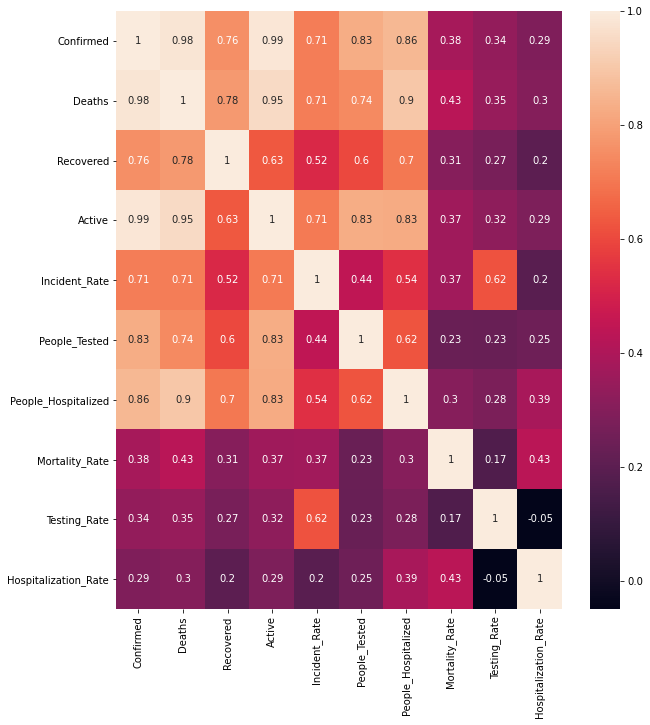

In [11]:
# heatmap correlation
import seaborn as sns
corr_hmap=df.corr()
plt.figure(figsize=(10,11))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Observation: Here lighter color of the cells represents highly correlated while darker represents low correlation whic indicates 
             that confirmed is highly correlated and hospitalization rate is less correlated with target variable(Deaths).

# Data Vizualization

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

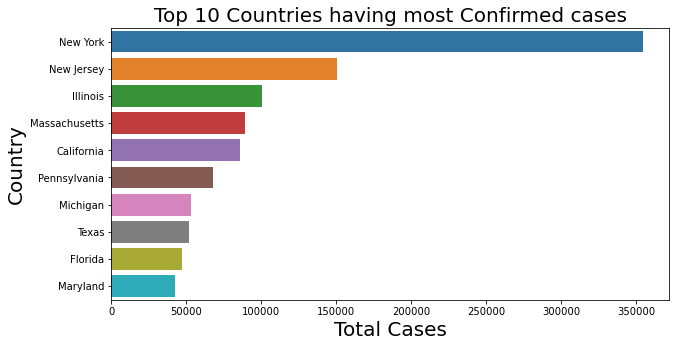

In [12]:
top = df[df['Last_Update'] == df['Last_Update'].max()]
top_confirm= top.groupby(by='Province_State')['Confirmed'].sum().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(10,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Total Cases",fontsize=20)
plt.ylabel("Country",fontsize=20)
plt.title("Top 10 Countries having most Confirmed cases",fontsize=20)
ax = sns.barplot(x=top_confirm.Confirmed,y=top_confirm.Province_State)
ax.set(xlabel="Total Cases",ylabel="Country")

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

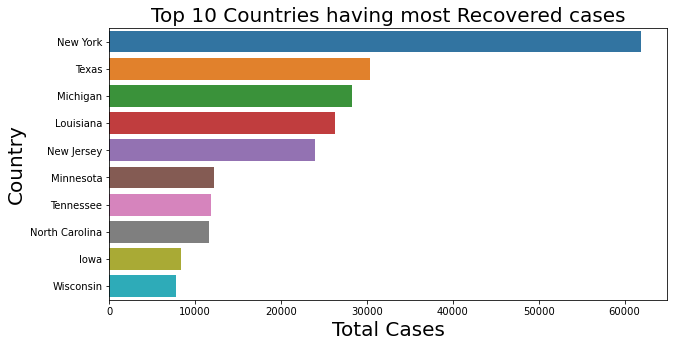

In [13]:
top_recovered= top.groupby(by='Province_State')['Recovered'].sum().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(10,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Total Cases",fontsize=20)
plt.ylabel("Country",fontsize=20)
plt.title("Top 10 Countries having most Recovered cases",fontsize=20)
ax = sns.barplot(x=top_recovered.Recovered,y=top_recovered.Province_State)
ax.set(xlabel="Total Cases",ylabel="Country")

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

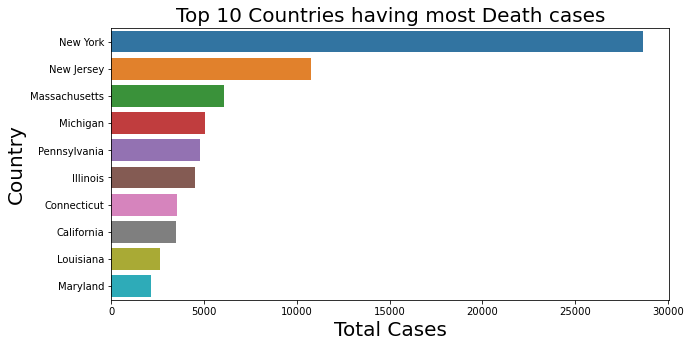

In [14]:
top_deaths= top.groupby(by='Province_State')['Deaths'].sum().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(10,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Total Cases",fontsize=20)
plt.ylabel("Country",fontsize=20)
plt.title("Top 10 Countries having most Death cases",fontsize=20)
ax = sns.barplot(x=top_deaths.Deaths,y=top_deaths.Province_State)
ax.set(xlabel="Total Cases",ylabel="Country")

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

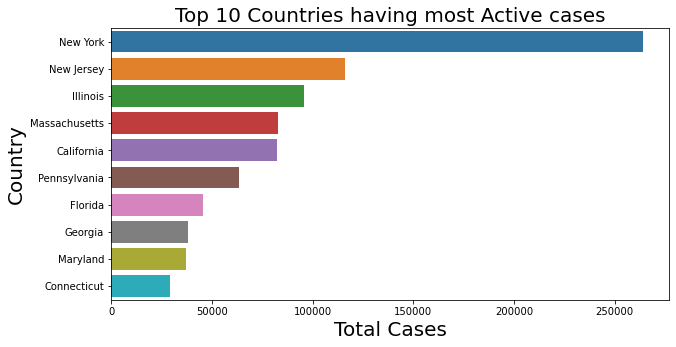

In [15]:
top_active= top.groupby(by='Province_State')['Active'].sum().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(10,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Total Cases",fontsize=20)
plt.ylabel("Country",fontsize=20)
plt.title("Top 10 Countries having most Active cases",fontsize=20)
ax = sns.barplot(x=top_active.Active,y=top_active.Province_State)
ax.set(xlabel="Total Cases",ylabel="Country")

(array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 ]),
 <a list of 7 Text major ticklabel objects>)

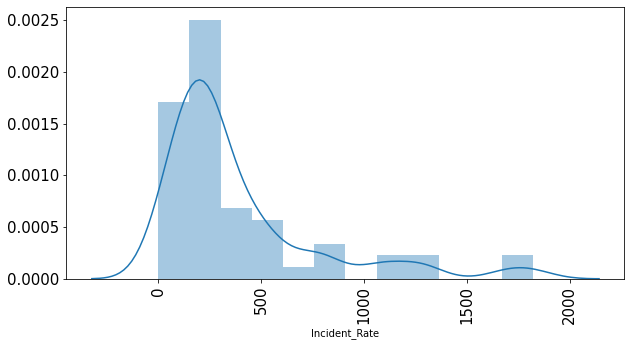

In [16]:
# plot to check incident rate 
plt.figure(figsize=(10,5))
sns.distplot(df['Incident_Rate'] )
plt.xticks(rotation = 90,fontsize = 15)
plt.yticks(fontsize = 15)

(array([0.0e+00, 5.0e-05, 1.0e-04, 1.5e-04, 2.0e-04, 2.5e-04, 3.0e-04,
        3.5e-04, 4.0e-04]),
 <a list of 9 Text major ticklabel objects>)

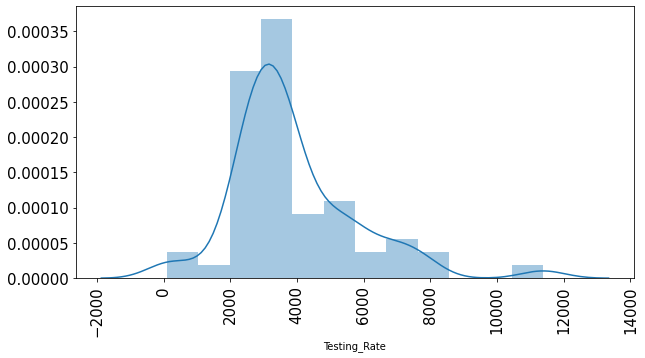

In [17]:
# plot to check testing rate
plt.figure(figsize=(10,5))
sns.distplot(df['Testing_Rate'] )
plt.xticks(rotation = 90,fontsize = 15)
plt.yticks(fontsize = 15)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 <a list of 9 Text major ticklabel objects>)

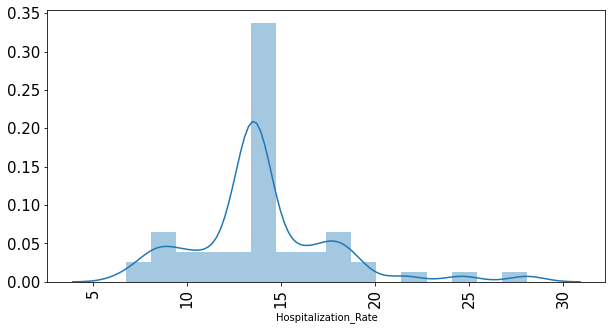

In [18]:
# plot to check hospitilization rate
plt.figure(figsize=(10,5))
sns.distplot(df['Hospitalization_Rate'] )
plt.xticks(rotation = 90,fontsize = 15)
plt.yticks(fontsize = 15)

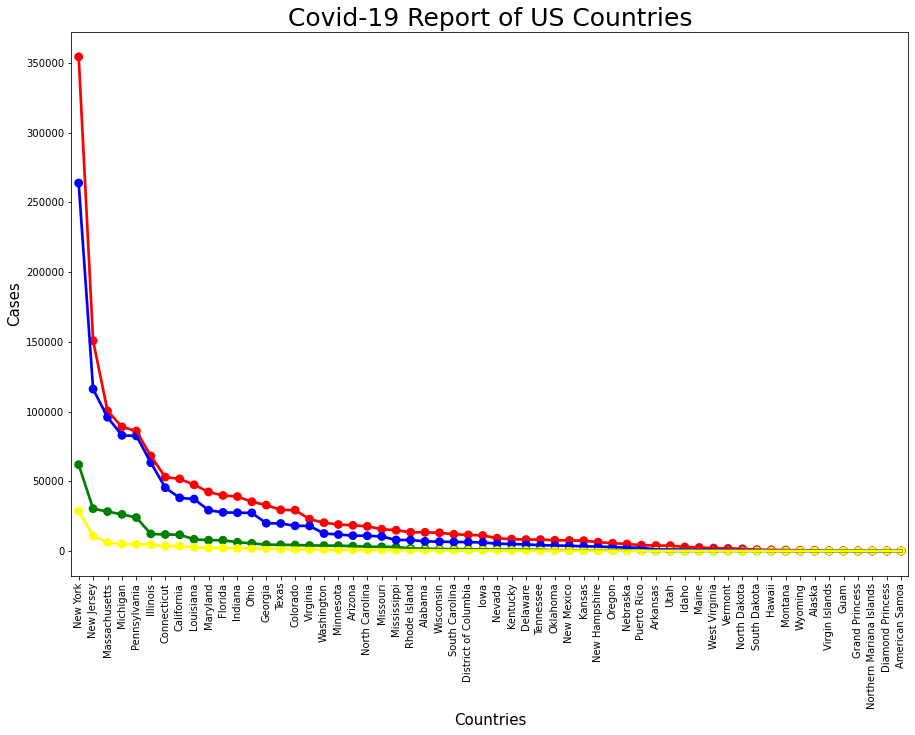

In [19]:
top_confirm= top.groupby(by='Province_State')['Confirmed'].sum().sort_values(ascending=False).reset_index()
top_recovered= top.groupby(by='Province_State')['Recovered'].sum().sort_values(ascending=False).reset_index()
top_deaths= top.groupby(by='Province_State')['Deaths'].sum().sort_values(ascending=False).reset_index()
top_active= top.groupby(by='Province_State')['Active'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,10))
sns.pointplot(top_confirm.Province_State,top_confirm.Confirmed,color="Red")
sns.pointplot(top_recovered.Province_State,top_recovered.Recovered,color="Green")
sns.pointplot(top_active.Province_State,top_active.Active,color="Blue")
sns.pointplot(top_deaths.Province_State,top_deaths.Deaths,color="Yellow")
plt.title("Covid-19 Report of US Countries", fontsize=25)
plt.xticks(rotation = 90)
plt.ylabel("Cases",fontsize=15)
plt.xlabel("Countries",fontsize=15)
plt.show()


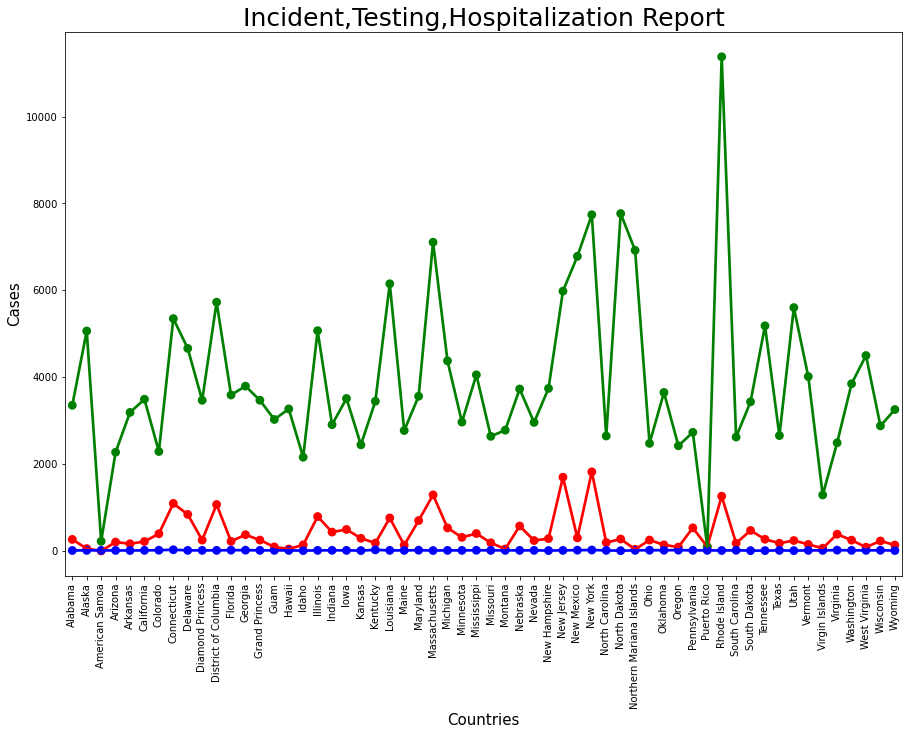

In [20]:
incident= top.groupby(by='Province_State')['Incident_Rate'].sum().reset_index()
test= top.groupby(by='Province_State')['Testing_Rate'].sum().reset_index()
hospitalization= top.groupby(by='Province_State')['Hospitalization_Rate'].sum().reset_index()

plt.figure(figsize=(15,10))
sns.pointplot(incident.Province_State,incident.Incident_Rate,color="Red")
sns.pointplot(test.Province_State,test.Testing_Rate,color="Green")
sns.pointplot(hospitalization.Province_State,hospitalization.Hospitalization_Rate,color="Blue")

plt.title("Incident,Testing,Hospitalization Report", fontsize=25)
plt.xticks(rotation = 90)
plt.ylabel("Cases",fontsize=15)
plt.xlabel("Countries",fontsize=15)
plt.show()

# EDA

Confirmed                  AxesSubplot(0.125,0.536818;0.133621x0.343182)
Deaths                  AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Recovered                AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Active                  AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Incident_Rate           AxesSubplot(0.766379,0.536818;0.133621x0.343182)
People_Tested                 AxesSubplot(0.125,0.125;0.133621x0.343182)
People_Hospitalized        AxesSubplot(0.285345,0.125;0.133621x0.343182)
Mortality_Rate              AxesSubplot(0.44569,0.125;0.133621x0.343182)
Testing_Rate               AxesSubplot(0.606034,0.125;0.133621x0.343182)
Hospitalization_Rate       AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

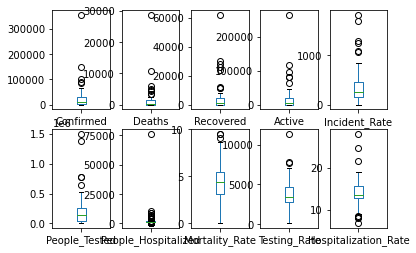

In [21]:
# checking outliers
df.plot.box(subplots=True,layout=(2,5))

In [22]:
# dropping categorical columns not necessary now
df.drop('Province_State',axis=1,inplace=True)
df.drop('Last_Update',axis=1,inplace=True)

In [23]:
# removing outliers

from scipy.stats import zscore

z=np.abs(zscore(df))
print(df.shape)
df=df.loc[(z<3).all(axis=1)]
print(df.shape)

(58, 10)
(53, 10)


In [24]:
# checking skewness
df.skew()

Confirmed               2.054444
Deaths                  2.371053
Recovered               2.797145
Active                  2.625579
Incident_Rate           1.768578
People_Tested           1.848863
People_Hospitalized     2.146497
Mortality_Rate          0.528828
Testing_Rate            0.626950
Hospitalization_Rate    0.435975
dtype: float64

In [25]:
# treating skewness using log

for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.cbrt(df[col])

In [26]:
# checking skewness again
df.skew()

Confirmed               0.236701
Deaths                  0.597743
Recovered               0.511007
Active                  0.563977
Incident_Rate          -0.226108
People_Tested           0.012833
People_Hospitalized     0.478734
Mortality_Rate          0.528828
Testing_Rate           -1.568552
Hospitalization_Rate    0.435975
dtype: float64

# Sending Data to Models

In [27]:
#splitting the data for training and test

x=df.drop(columns=['Deaths'])
y=df['Deaths']

In [28]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [31]:
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor()]

for m in model:
    m.fit(x_train,y_train)
    print("Score of ",m," is",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("Error:")
    print("Mean Absolute Error:",mean_absolute_error(y_test,predm))
    print("Mean Squared Error:",mean_squared_error(y_test,predm))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 Score:",r2_score(y_test,predm))
    print("**************************************************************************************************")
    print('\n')

Score of  LinearRegression()  is 0.9886489465795082
Error:
Mean Absolute Error: 0.6513512323370425
Mean Squared Error: 0.7051160673145153
Root Mean Squared Error: 0.8397118954227785
R2 Score: 0.9146536628810963
**************************************************************************************************


Score of  Lasso()  is 0.9228325416497836
Error:
Mean Absolute Error: 0.6995205345824288
Mean Squared Error: 0.7858498656338572
Root Mean Squared Error: 0.8864817345178958
R2 Score: 0.9048817483160312
**************************************************************************************************


Score of  Ridge()  is 0.9855732210876144
Error:
Mean Absolute Error: 0.5867322299702187
Mean Squared Error: 0.6962069250528489
Root Mean Squared Error: 0.8343901515794927
R2 Score: 0.9157320139415115
**************************************************************************************************


Score of  ElasticNet()  is 0.914250796463076
Error:
Mean Absolute Error: 0.74746639055

# Using Some Ensemble Techniques to boost our scores

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
model=[RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    print("Score of ",m," is",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("Error:")
    print("Mean Absolute Error:",mean_absolute_error(y_test,predm))
    print("Mean Squared Error:",mean_squared_error(y_test,predm))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 Score:",r2_score(y_test,predm))
    print("**************************************************************************************************")
    print('\n')

Score of  RandomForestRegressor()  is 0.9867307192888671
Error:
Mean Absolute Error: 0.8216197677470937
Mean Squared Error: 1.2496323915413106
Root Mean Squared Error: 1.117869577160641
R2 Score: 0.8487461110205918
**************************************************************************************************


Score of  AdaBoostRegressor()  is 0.9908071504469301
Error:
Mean Absolute Error: 0.9144355083615721
Mean Squared Error: 1.522199187309213
Root Mean Squared Error: 1.2337743664500462
R2 Score: 0.8157549784718414
**************************************************************************************************


Score of  GradientBoostingRegressor()  is 0.9999949224521948
Error:
Mean Absolute Error: 0.9137976104579234
Mean Squared Error: 1.8186637076206147
Root Mean Squared Error: 1.3485784024744778
R2 Score: 0.7798712962425368
**************************************************************************************************




# Using GridsearchCv to get best parameters

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
# best parameters for ridge
ridge=Ridge()
parameters={'alpha':[0.001,0.01,0.1,1],'random_state':range(37,100)}
clf=GridSearchCV(ridge,parameters)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001, 'random_state': 37}

In [36]:
# using Ridge with best results
ridge=Ridge(alpha=0.001,random_state=37)
ridge.fit(x_train,y_train)
print("Score is ",ridge.score(x_train,y_train))
predridge=ridge.predict(x_test)
print('\n')
print("Mean Absolute Error:",mean_absolute_error(y_test,predridge))
print("Mean Squared Error:",mean_squared_error(y_test,predridge))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predridge)))
print("R2 Score:",r2_score(y_test,predridge))

Score is  0.9886488803162692


Mean Absolute Error: 0.6507890235706477
Mean Squared Error: 0.7047531873486627
Root Mean Squared Error: 0.839495793526485
R2 Score: 0.9146975854029831


In [37]:
# best parameters for knr
from sklearn.model_selection import GridSearchCV
knr=KNeighborsRegressor()
neighbors={'n_neighbors':range(1,30)}
clf=GridSearchCV(knr,neighbors)
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 2}

In [38]:
# using kneighbors with best result
knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train,y_train)
print("Score is ",knr.score(x_train,y_train))
predknr=knr.predict(x_test)
print('\n')
print("Mean Absolute Error:",mean_absolute_error(y_test,predknr))
print("Mean Squared Error:",mean_squared_error(y_test,predknr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predknr)))
print("R2 Score:",r2_score(y_test,predknr))

Score is  0.9547780274806978


Mean Absolute Error: 0.7032338563089158
Mean Squared Error: 0.7064485579519556
Root Mean Squared Error: 0.8405049422531409
R2 Score: 0.9144923799371635


# Best Model

In [39]:
# so best model is Ridge
# using Ridge with best results
ridge=Ridge(alpha=0.001,random_state=37)
ridge.fit(x_train,y_train)
print("Score is ",ridge.score(x_train,y_train))
predridge=ridge.predict(x_test)
print('\n')
print("Mean Absolute Error:",mean_absolute_error(y_test,predridge))
print("Mean Squared Error:",mean_squared_error(y_test,predridge))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predridge)))
print("R2 Score:",r2_score(y_test,predridge))

Score is  0.9886488803162692


Mean Absolute Error: 0.6507890235706477
Mean Squared Error: 0.7047531873486627
Root Mean Squared Error: 0.839495793526485
R2 Score: 0.9146975854029831


# Cross Validation

In [40]:
# cross validation
from sklearn.model_selection import cross_val_score

ridgescores=cross_val_score(ridge,x,y,cv=5)
print(ridgescores)
print(ridgescores.mean(),ridgescores.std())

[0.97184786 0.98969224 0.94698341 0.95053301 0.90456364]
0.9527240320172924 0.028599118184345865


# Plot between Test and Predicted data

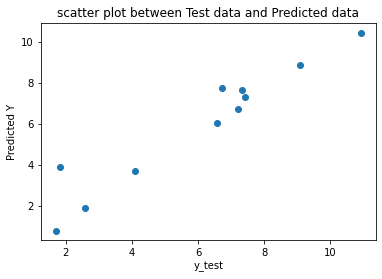

In [41]:
# Scatter plot between Test and Predicted Data
plt.scatter(y_test,predridge)
plt.xlabel('y_test')
plt.ylabel('Predicted Y')
plt.title("scatter plot between Test data and Predicted data")
plt.show()

# Saving the Model

In [42]:
import joblib
joblib.dump(ridge,'Covid_US_project.obj')


['Covid_US_project.obj']